In [1]:
def glimpse(df, maxvals=10, maxlen=110):
    print('Shape: ', df.shape)
    
    def pad(y):
        max_len = max([len(x) for x in y])
        return [x.ljust(max_len) for x in y]
    
    # Column Name
    toprnt = pad(df.columns.tolist())
    
    # Column Type
    toprnt = pad([toprnt[i] + ' ' + str(df.iloc[:,i].dtype) for i in range(df.shape[1])])
    
    # Num NAs
    num_nas = [df.iloc[:,i].isnull().sum() for i in range(df.shape[1])]
    num_nas_ratio = [int(round(x*100/df.shape[0])) for x in num_nas]
    num_nas_str = [str(x) + ' (' + str(y) + '%)' for x,y in zip(num_nas, num_nas_ratio)]
    max_len = max([len(x) for x in num_nas_str])
    num_nas_str = [x.rjust(max_len) for x in num_nas_str]
    toprnt = [x + ' ' + y + ' NAs' for x,y in zip(toprnt, num_nas_str)]
    
    # Separator
    toprnt = [x + ' : ' for x in toprnt]
    
    # Values
    toprnt = [toprnt[i] + ', '.join([str(y) for y in df.iloc[:min([maxvals,df.shape[0]]), i]]) for i in range(df.shape[1])]
    
    # Trim to maxlen
    toprnt = [x[:min(maxlen, len(x))] for x in toprnt]
    
    for x in toprnt:
        print(x)

In [2]:
import pandas as pd
import sklearn 
import seaborn as sns 
import numpy as np
import random
pd.set_option('display.max_columns', 500)
# random.seed(5483)

In [3]:
training_set = pd.read_csv("training_set/log_mini.csv")
track_features = pd.read_csv("track_features/tf_mini.csv")

<AxesSubplot:>

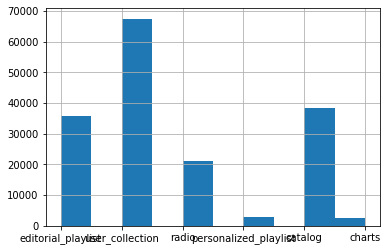

In [4]:
training_set.context_type.hist()

<AxesSubplot:>

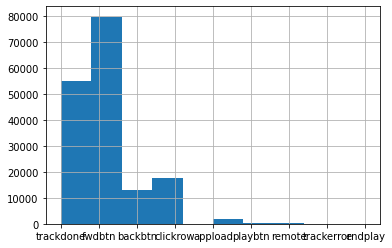

In [5]:
training_set.hist_user_behavior_reason_start.hist()

<AxesSubplot:>

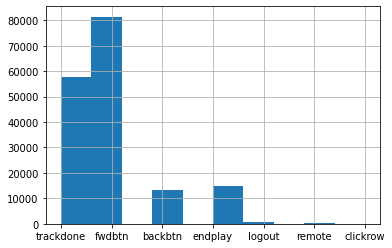

In [6]:
training_set.hist_user_behavior_reason_end.hist()

<AxesSubplot:>

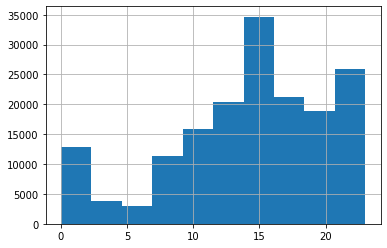

In [7]:
training_set.hour_of_day.hist()

In [8]:
glimpse(training_set)

Shape:  (167880, 21)
session_id                      object 0 (0%) NAs : 0_00006f66-33e5-4de7-a324-2d18e439fc1e, 0_00006f66-33e5-4d
session_position                int64  0 (0%) NAs : 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
session_length                  int64  0 (0%) NAs : 20, 20, 20, 20, 20, 20, 20, 20, 20, 20
track_id_clean                  object 0 (0%) NAs : t_0479f24c-27d2-46d6-a00c-7ec928f2b539, t_9099cd7b-c238-47
skip_1                          bool   0 (0%) NAs : False, False, False, False, False, False, True, True, Fals
skip_2                          bool   0 (0%) NAs : False, False, False, False, False, False, True, True, True
skip_3                          bool   0 (0%) NAs : False, False, False, False, False, True, True, True, True,
not_skipped                     bool   0 (0%) NAs : True, True, True, True, True, False, False, False, False, 
context_switch                  int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
no_pause_before_play            int64  0 (0%) NAs : 0, 1, 1

## Explore Track Features

In [9]:
glimpse(track_features)

Shape:  (50704, 30)
track_id               object  0 (0%) NAs : t_a540e552-16d4-42f8-a185-232bd650ea7d, t_67965da0-132b-4b1e-8a69-
duration               float64 0 (0%) NAs : 109.70667266845705, 187.69332885742188, 160.83999633789062, 175.39
release_year           int64   0 (0%) NAs : 1950, 1950, 1951, 1951, 1951, 1951, 1952, 1952, 1954, 1954
us_popularity_estimate float64 0 (0%) NAs : 99.97541442005864, 99.96942966649577, 99.6025486718809, 99.6650178
acousticness           float64 0 (0%) NAs : 0.458040177822113, 0.9162718057632446, 0.8128837943077087, 0.39685
beat_strength          float64 0 (0%) NAs : 0.519496500492096, 0.4192226529121398, 0.4258897304534912, 0.40093
bounciness             float64 0 (0%) NAs : 0.5049487352371215, 0.5455302000045776, 0.5082798600196838, 0.3599
danceability           float64 0 (0%) NAs : 0.3997668921947479, 0.4912352859973907, 0.4916245937347412, 0.5522
dyn_range_mean         float64 0 (0%) NAs : 7.511880397796632, 9.098376274108887, 8.368670463562012,

In [10]:
# training_set.info()
track_features.sample(2)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
39011,t_7ccef268-0886-4325-a1c3-a58ef3493f14,284.000000,1999,99.983300,0.005826,0.536149,0.568977,0.678171,8.583563,0.770188,0.99972,1.620311e-07,9,0.108593,-4.399,0.457219,minor,0.383826,0.221816,90.000000,4,0.412484,-0.873399,0.254739,0.182606,0.208809,-0.311199,-0.091726,-0.497055,0.159594
39587,t_d4d07a39-8141-4c07-b391-a7481e1b91b0,202.733337,2008,93.389482,0.369576,0.483924,0.469619,0.649967,7.193161,0.756516,1.01686,2.888746e-09,9,0.102494,-7.174,0.664141,major,0.353120,0.028500,135.945999,4,0.561109,-0.279391,0.343260,0.464239,0.246093,0.492582,0.028731,0.584520,-0.183991


## Explore Training data

In [11]:
s1 = training_set.skip_1
s2 = training_set.skip_2
s3 = training_set.skip_3
not_s = training_set.not_skipped

print(training_set.shape)
index_to_drop = []
for i in range(len(s1)):
    # print(s1[i])
    if s1[i] == True and s2[i] == True and s3[i] == True and not_s[i] == False:
        continue
    if s1[i] == False and s2[i] == True and s3[i] == True and not_s[i] == False:
        continue
    if s1[i] == False and s2[i] == False and s3[i] == True and not_s[i] == False:
        continue
    if s1[i] == False and s2[i] == False and s3[i] == False and not_s[i] == False:
        continue
    if s1[i] == False and s2[i] == False and s3[i] == False and not_s[i] == True:
        continue
    
    index_to_drop.append(i)
    # print(training_set.loc[i, :])

print(index_to_drop)
training_set = training_set.drop(index_to_drop)
print(training_set.shape)

(167880, 21)
[60932]
(167879, 21)


Prepreocess

In [12]:
training_set.date = pd.to_datetime(training_set.date)
training_set['wkdy'] = training_set.date.dt.dayofweek
training_set['day'] = training_set.date.dt.day
training_set['month'] = training_set.date.dt.month
training_set['year'] = training_set.date.dt.year

training_set.drop(columns=['skip_1', 'skip_3', 'not_skipped', 'date'], inplace = True)
glimpse(training_set)

Shape:  (167879, 21)
session_id                      object 0 (0%) NAs : 0_00006f66-33e5-4de7-a324-2d18e439fc1e, 0_00006f66-33e5-4d
session_position                int64  0 (0%) NAs : 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
session_length                  int64  0 (0%) NAs : 20, 20, 20, 20, 20, 20, 20, 20, 20, 20
track_id_clean                  object 0 (0%) NAs : t_0479f24c-27d2-46d6-a00c-7ec928f2b539, t_9099cd7b-c238-47
skip_2                          bool   0 (0%) NAs : False, False, False, False, False, False, True, True, True
context_switch                  int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
no_pause_before_play            int64  0 (0%) NAs : 0, 1, 1, 1, 1, 1, 1, 1, 1, 1
short_pause_before_play         int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
long_pause_before_play          int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
hist_user_behavior_n_seekfwd    int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
hist_user_behavior_n_seekback   int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0

In [13]:
column_to_conv = ['premium', 'skip_2', 'hist_user_behavior_is_shuffle']
for i in range(len(column_to_conv)):
    print(column_to_conv[i])
    training_set[column_to_conv[i]] = training_set[column_to_conv[i]].astype('int64')
glimpse(training_set)
# print(type(training_set.date[0].day))

premium
skip_2
hist_user_behavior_is_shuffle
Shape:  (167879, 21)
session_id                      object 0 (0%) NAs : 0_00006f66-33e5-4de7-a324-2d18e439fc1e, 0_00006f66-33e5-4d
session_position                int64  0 (0%) NAs : 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
session_length                  int64  0 (0%) NAs : 20, 20, 20, 20, 20, 20, 20, 20, 20, 20
track_id_clean                  object 0 (0%) NAs : t_0479f24c-27d2-46d6-a00c-7ec928f2b539, t_9099cd7b-c238-47
skip_2                          int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 1, 1, 1, 1
context_switch                  int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
no_pause_before_play            int64  0 (0%) NAs : 0, 1, 1, 1, 1, 1, 1, 1, 1, 1
short_pause_before_play         int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
long_pause_before_play          int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
hist_user_behavior_n_seekfwd    int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
hist_user_behavior_n_seekback   int64  0 (0%) NAs : 0

In [14]:
# training_set['mode'] = training_set['mode'].replace({
#     'major': 0,
#     'minor': 1,
# })
context_type_dict = {}
context_type_list = training_set.context_type.unique()
print(context_type_list)
for i in range(len(context_type_list)):
    context_type_dict[context_type_list[i]] = i

training_set['context_type'] = training_set['context_type'].replace(context_type_dict)

hist_user_behavior_reason_start_dict = {}
hist_user_behavior_reason_start_list = training_set.hist_user_behavior_reason_start.unique()
print(hist_user_behavior_reason_start_list)
for i in range(len(hist_user_behavior_reason_start_list)):
    hist_user_behavior_reason_start_dict[hist_user_behavior_reason_start_list[i]] = i

training_set['hist_user_behavior_reason_start'] = training_set['hist_user_behavior_reason_start'].replace(hist_user_behavior_reason_start_dict)


hist_user_behavior_reason_end_dict = {}
hist_user_behavior_reason_end_list = training_set.hist_user_behavior_reason_end.unique()
print(hist_user_behavior_reason_end_list)
for i in range(len(hist_user_behavior_reason_end_list)):
    hist_user_behavior_reason_end_dict[hist_user_behavior_reason_end_list[i]] = i

training_set['hist_user_behavior_reason_end'] = training_set['hist_user_behavior_reason_end'].replace(hist_user_behavior_reason_end_dict)

# session_id_dict = {}
# session_id_list = training_set.session_id.unique()
# print(session_id_list)
# for i in range(len(session_id_list)):
#     session_id_dict[session_id_list[i]] = i

# training_set['session_id'] = training_set['session_id'].replace(session_id_dict)


glimpse(training_set)


['editorial_playlist' 'user_collection' 'radio' 'personalized_playlist'
 'catalog' 'charts']
['trackdone' 'fwdbtn' 'backbtn' 'clickrow' 'appload' 'playbtn' 'remote'
 'trackerror' 'endplay']
['trackdone' 'fwdbtn' 'backbtn' 'endplay' 'logout' 'remote' 'clickrow']
Shape:  (167879, 21)
session_id                      object 0 (0%) NAs : 0_00006f66-33e5-4de7-a324-2d18e439fc1e, 0_00006f66-33e5-4d
session_position                int64  0 (0%) NAs : 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
session_length                  int64  0 (0%) NAs : 20, 20, 20, 20, 20, 20, 20, 20, 20, 20
track_id_clean                  object 0 (0%) NAs : t_0479f24c-27d2-46d6-a00c-7ec928f2b539, t_9099cd7b-c238-47
skip_2                          int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 1, 1, 1, 1
context_switch                  int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
no_pause_before_play            int64  0 (0%) NAs : 0, 1, 1, 1, 1, 1, 1, 1, 1, 1
short_pause_before_play         int64  0 (0%) NAs : 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# TODO: JOIN TRACK FEATURE

In [15]:
## Implement different methods: logistic regression, decision tree

<AxesSubplot:>

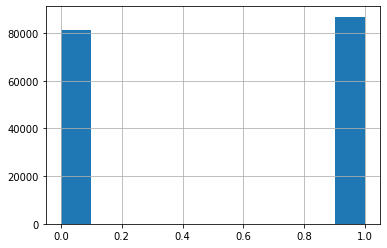

In [16]:
training_set.skip_2.hist()

<AxesSubplot:>

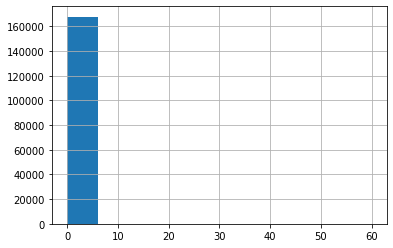

In [17]:
training_set.hist_user_behavior_n_seekfwd.hist()


<AxesSubplot:>

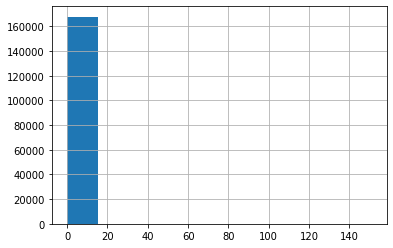

In [18]:
training_set.hist_user_behavior_n_seekback.hist()

<AxesSubplot:>

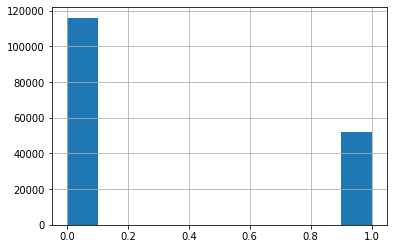

In [19]:
training_set.hist_user_behavior_is_shuffle.hist()


<AxesSubplot:>

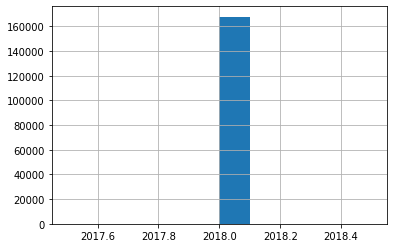

In [20]:
training_set.year.hist()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot

cls_to_drop = ['session_id', 'skip_2', 'track_id_clean']
# cls_to_drop = ['skip_2', 'track_id_clean', 'session_length']
X_train, X_test, y_train, y_test = train_test_split(training_set.drop(columns = cls_to_drop, inplace = False), training_set['skip_2'], train_size = 0.8, shuffle = True)
# print(len(X_train), len(X_test))

tree = DecisionTreeClassifier(random_state=0)
# print(X_train.values)
tree.fit(X_train.values, y_train.values)
# score is mean accuracy
print('Train score:{:.3f}'.format(tree.score(X_train.values, y_train.values)))
print('Test score:{:.3f}'.format(tree.score(X_test.values, y_test.values)))

# cls_to_drop = ['session_id', 'skip_2', 'track_id_clean']
# X_train,X_test,y_train,y_test = train_test_split(training_set.drop(columns = cls_to_drop, inplace = False), training_set['skip_2'], train_size = 0.8, shuffle = True)
# # print(len(X_train), len(X_test))

# tree = DecisionTreeClassifier(random_state=0)
# tree.fit(X_train, y_train)
# print('Train score:{:.3f}'.format(tree.score(X_train,y_train)))
# print('Test score:{:.3f}'.format(tree.score(X_test,y_test)))

Train score:0.967
Test score:0.843


In [22]:
# X_train.feature_names

In [23]:
# print(X_test.values[0])

In [24]:
# 0 means not skipping and 1 means skipping
test_length = len(X_test.values)
pred = tree.predict(X_test.values)
label = y_test.values
print(pred)
print(label)
TP = 0
FN = 0
TN = 0
FP = 0

for i in range(test_length):
    if pred[i] == 1 and label[i] == 1:
        TP += 1
    if pred[i] == 0 and label[i] == 1:
        FN += 1
    if pred[i] == 0 and label[i] == 0:
        TN += 1
    if pred[i] == 1 and label[i] == 0:
        FP += 1

print("TP = " + str(TP))
print("TP = " + str(FN))
print("TP = " + str(TN))
print("TP = " + str(FP))
print("Accuracy: " + str((TP+TN)/(TP+FN+FP+TN)))
print("Precision: " + str(TP/(TP+FP)))
print("Recll: ", str(TP/(TP+FN)))

[0 0 1 ... 1 1 1]
[0 0 1 ... 0 1 1]
TP = 14737
TP = 2678
TP = 13564
TP = 2597
Accuracy: 0.8428937336192518
Precision: 0.8501788392754125
Recll:  0.8462245190927361
